### 03. Extract the Reflectance from Black and White Reference at MicaSense Bands: Pininj
#### Gayantha R. L. Kodikara, 30/08/2023 @ UWM Update 08/03/2024, 31/05/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S0012 = np.genfromtxt('S0012.txt', skip_header=1)
S0013 = np.genfromtxt('S0013.txt', skip_header=1)

In [3]:
SWORI = S0012.copy()
S0012[:,1] *= 0.75
S0012

array([[3.50000000e+02, 2.99494654e-01],
       [3.51000000e+02, 2.98013113e-01],
       [3.52000000e+02, 2.94632569e-01],
       ...,
       [2.49800000e+03, 2.32609347e-01],
       [2.49900000e+03, 2.33050056e-01],
       [2.50000000e+03, 2.33403236e-01]])

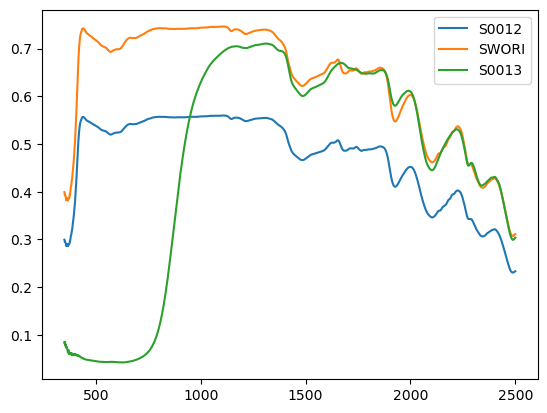

In [4]:
plt.plot(S0012[:,0], S0012[:,1], label = "S0012")
plt.plot(SWORI[:,0], SWORI[:,1], label = "SWORI")
plt.plot(S0013[:,0], S0013[:,1], label = "S0013")
plt.legend()
plt.show()

In [5]:
# Band 1 Positions
print('Band 1 low:', np.where(S0012[:,0] == 465), 'Band 1 high:', np.where(S0012[:,0] == 485))
print('Band 2 low:', np.where(S0012[:,0] == 550), 'Band 2 high:', np.where(S0012[:,0] == 570))
print('Band 3 low:', np.where(S0012[:,0] == 663), 'Band 3 high:', np.where(S0012[:,0] == 673))
print('Band 4 low:', np.where(S0012[:,0] == 820), 'Band 4 high:', np.where(S0012[:,0] == 860))
print('Band 5 low:', np.where(S0012[:,0] == 712), 'Band 5 high:', np.where(S0012[:,0] == 722))

Band 1 low: (array([115]),) Band 1 high: (array([135]),)
Band 2 low: (array([200]),) Band 2 high: (array([220]),)
Band 3 low: (array([313]),) Band 3 high: (array([323]),)
Band 4 low: (array([470]),) Band 4 high: (array([510]),)
Band 5 low: (array([362]),) Band 5 high: (array([372]),)


In [6]:
SW1M = S0012[115:135,1].mean()
SW2M = S0012[200:220,1].mean()
SW3M = S0012[313:323,1].mean()
SW4M = S0012[470:510,1].mean()
SW5M = S0012[362:372,1].mean()

In [7]:
SW5M

0.5460611790418626

In [8]:
SB1M = S0013[115:135,1].mean()
SB2M = S0013[200:220,1].mean()
SB3M = S0013[313:323,1].mean()
SB4M = S0013[470:510,1].mean()
SB5M = S0013[362:372,1].mean()

In [9]:
SWM = np.stack((SW1M,SW2M,SW3M,SW4M,SW5M))
SBM = np.stack((SB1M,SB2M,SB3M,SB4M,SB5M))
WL = [475,560,668,840,717]
ReferenceSpectra = (np.stack((WL,SBM,SWM))).T
ReferenceSpectra

array([[4.75000000e+02, 4.66712279e-02, 5.44809479e-01],
       [5.60000000e+02, 4.31325030e-02, 5.22613797e-01],
       [6.68000000e+02, 4.46042925e-02, 5.41990936e-01],
       [8.40000000e+02, 2.11278479e-01, 5.56544852e-01],
       [7.17000000e+02, 5.26647139e-02, 5.46061179e-01]])

In [10]:
ReferenceSpectra.shape

(5, 3)

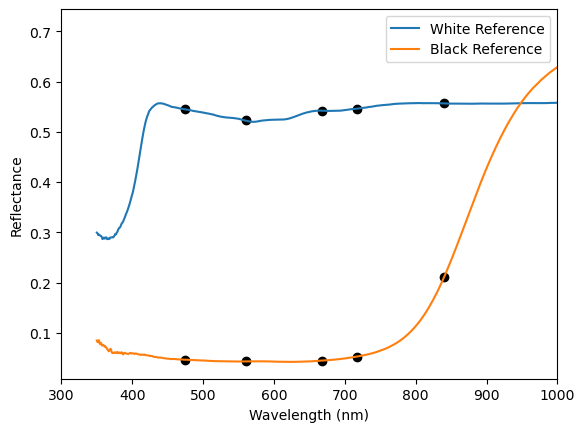

In [11]:
plt.plot(S0012[:,0], S0012[:,1], label = "White Reference")
plt.plot(S0013[:,0], S0013[:,1], label = "Black Reference")
plt.xlim(300,1000)
plt.scatter(475,ReferenceSpectra[0,1], color ='k')
plt.scatter(560,ReferenceSpectra[1,1], color ='k')
plt.scatter(668,ReferenceSpectra[2,1], color ='k')
plt.scatter(840,ReferenceSpectra[3,1], color ='k')
plt.scatter(717,ReferenceSpectra[4,1], color ='k')
plt.scatter(475,ReferenceSpectra[0,2], color ='k')
plt.scatter(560,ReferenceSpectra[1,2], color ='k')
plt.scatter(668,ReferenceSpectra[2,2], color ='k')
plt.scatter(840,ReferenceSpectra[3,2], color ='k')
plt.scatter(717,ReferenceSpectra[4,2], color ='k')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.legend()
plt.savefig("Reference_Spectra.png", dpi =300)
plt.show()

In [12]:
# Save the Reference Panel Field Spectral data
np.save('ReflectancePanel.npy', ReferenceSpectra)

Move to fourth Module ;-)